In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [34]:
data = pd.read_csv('Dataset-Tugas.csv')
print('df')

df


EDA

In [35]:
data.drop(columns='class', inplace=True)

In [36]:
data.shape

(150, 4)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [39]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


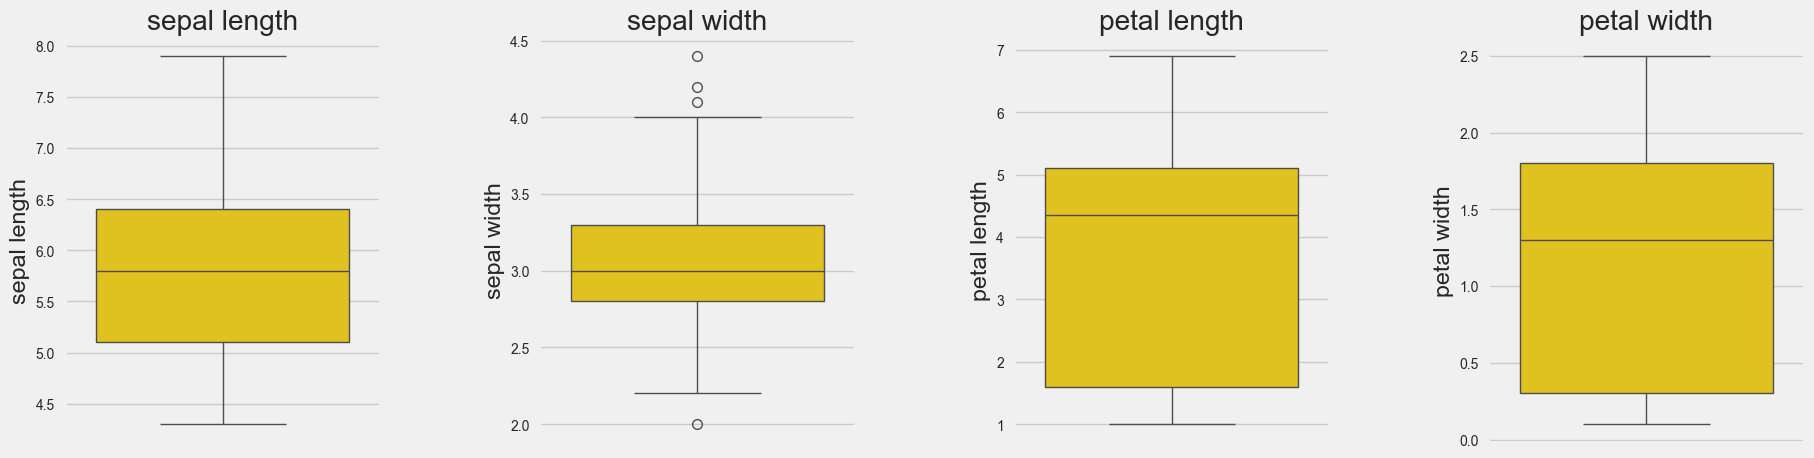

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data):
    # Definisikan variabel yang akan divisualisasikan
    variables = data.select_dtypes(exclude='object').columns
    num_vars = len(variables)  # Jumlah kolom numerik

    # Buat figure dan axes untuk subplot dengan ukuran yang sesuai
    fig, axes = plt.subplots(1, num_vars, figsize=(5 * num_vars, 5))  # Ukuran disesuaikan
    fig.subplots_adjust(hspace=0.2, wspace=0.5)  # Atur jarak antar subplot

    # Jika hanya ada satu variabel, 'axes' bukan array, jadi kita ubah jadi array
    if num_vars == 1:
        axes = [axes]

    # Iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="gold", ax=axes[i])
        axes[i].set_title(var)

    # Tampilkan plot
    plt.show()

# Panggil fungsi box_plot dengan data yang sesuai
box_plot(data)


Pre-Processing

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sepal length'] = le.fit_transform(data['sepal length'])
data.head()

,sepal length,sepal width,petal length,petal width
0,8,3.5,1.4,0.2
1,6,3.0,1.4,0.2
2,4,3.2,1.3,0.2
3,3,3.1,1.5,0.2
4,7,3.6,1.4,0.2


In [42]:
#instantiate
scaler =MinMaxScaler()

#fit_transform
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.23529412, 0.625     , 0.06779661, 0.04166667],
       [0.17647059, 0.41666667, 0.06779661, 0.04166667],
       [0.11764706, 0.5       , 0.05084746, 0.04166667],
       [0.08823529, 0.45833333, 0.08474576, 0.04166667],
       [0.20588235, 0.66666667, 0.06779661, 0.04166667],
       [0.32352941, 0.79166667, 0.11864407, 0.125     ],
       [0.08823529, 0.58333333, 0.06779661, 0.08333333],
       [0.20588235, 0.58333333, 0.08474576, 0.04166667],
       [0.02941176, 0.375     , 0.06779661, 0.04166667],
       [0.17647059, 0.45833333, 0.08474576, 0.        ],
       [0.32352941, 0.70833333, 0.08474576, 0.04166667],
       [0.14705882, 0.58333333, 0.10169492, 0.04166667],
       [0.14705882, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.44117647, 0.83333333, 0.03389831, 0.04166667],
       [0.41176471, 1.        , 0.08474576, 0.125     ],
       [0.32352941, 0.79166667, 0.05084746, 0.125     ],
       [0.23529412, 0.625     ,

MODELLING

1. K-Means

<function matplotlib.pyplot.show(close=None, block=None)>

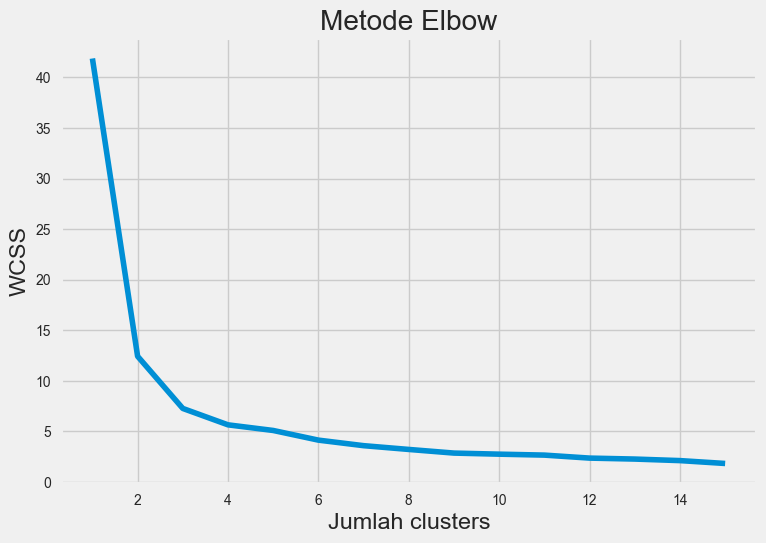

In [43]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show

In [44]:
# Menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

In [45]:
from sklearn.cluster import KMeans

# Inisialisasi model KMeans
model1 = KMeans(n_clusters=2, random_state=0)
y_pred1 = model1.fit_predict(X_scaled)


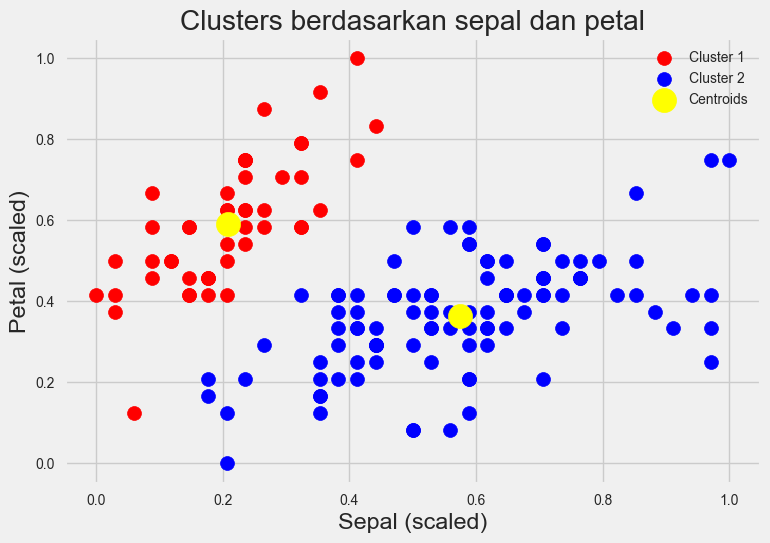

In [46]:
# Visualisasi hasil clusters
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0],  model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters berdasarkan sepal dan petal')
plt.xlabel('Sepal (scaled)')
plt.ylabel('Petal (scaled)')
plt.legend()
plt.show()

2. DB SCAN

In [47]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1,min_samples=10)

# Melakukan clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
data['Hasil_cluster'] = model2.labels_
data.head()

,sepal length,sepal width,petal length,petal width,Hasil_cluster
0,8,3.5,1.4,0.2,0
1,6,3.0,1.4,0.2,0
2,4,3.2,1.3,0.2,0
3,3,3.1,1.5,0.2,0
4,7,3.6,1.4,0.2,0


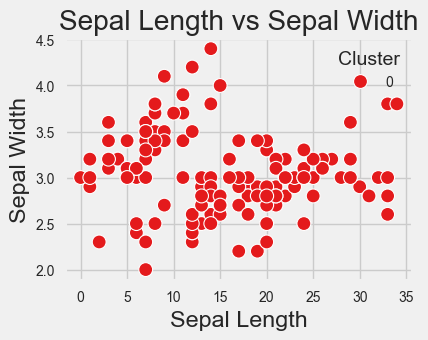

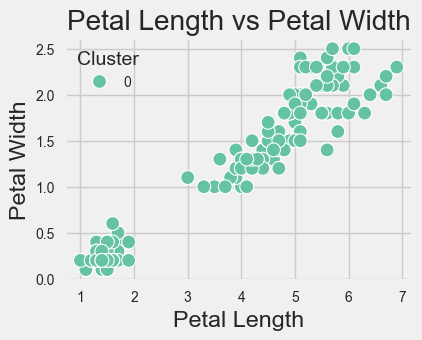

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Sepal Length vs Sepal Width
plt.figure(figsize=(4, 3))
sns.scatterplot(x='sepal length', y='sepal width', 
                hue='Hasil_cluster', data=data, palette='Set1', s=100)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Cluster')
plt.show()


# Plot Petal Length vs Petal Width
plt.figure(figsize=(4, 3))
sns.scatterplot(x='petal length', y='petal width', 
                hue='Hasil_cluster', data=data, palette='Set2', s=100)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Cluster')
plt.show()

MATRIKS EVALUASI

1. Silhouette_score

In [50]:
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print("silhouette_score:", Evaluasi_KMeans)

silhouette_score: 0.6270217548130915


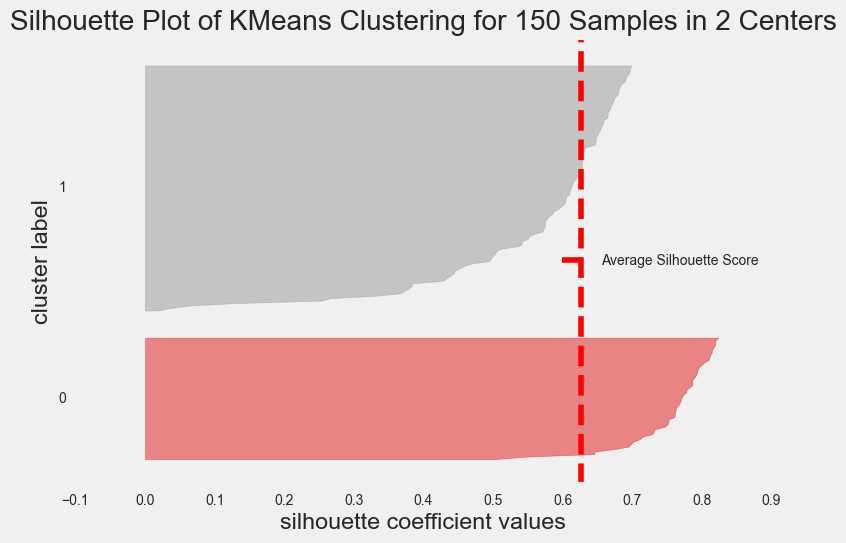

In [51]:
# Membuat silhouette vizualitation untuk algoritma k-means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [54]:
# Menghitung Silhouette_score algoritma db-scan
X_scaled = MinMaxScaler().fit_transform(data)

eps_value = [0.2,2.0,0.2]
min_sample_value = [1,8,3]

best_score = -1
best_param = {}

for eps in eps_value:
  for min_samples in min_sample_value:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_pred2=dbscan.fit_predict(X_scaled)

n_clusters = len(set(y_pred2)) - (1 if -1 in y_pred2 else 0)

if n_clusters > 1:
  score = silhouette_score(X_scaled,y_pred2)

  if score > best_score:
    best_score = score
    best_param = {'eps':eps, 'min_samples': min_samples}

print(f"Best parameter: {best_param}")
print(f"Best Silhoutte Score: {best_score}")

best_dbscan = DBSCAN(eps=best_param['eps'], min_samples=best_param['min_samples'])
y_pred2 = best_dbscan.fit_predict(X_scaled)



Best parameter: {'eps': 0.2, 'min_samples': 3}
Best Silhoutte Score: 0.5124243669512623


2. Davies-Bouldin Index (DBI)

In [55]:
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Bouldin Index (DBI):", dbi_score1)

Davies-Bouldin Index (DBI): 0.4910301639082763


In [56]:
# Menghitung Davies-Bouldin Index (DBI) algoritma db-scan
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies-Bouldin Index (DBI):", dbi_score2)

Davies-Bouldin Index (DBI): 4.147474707653646
